In [187]:
import datetime as datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tseries.offsets import MonthEnd

Question #1

In [104]:
data1 = pd.read_csv("DJIA.csv")
data1['Datetime'] = pd.to_datetime(data1['DATE'])
data1 = data1.set_index('Datetime')
data1 = data1.drop(['DATE'], axis=1)
data1 = data1['VALUE'].replace('.', np.nan)
data1 = data1.dropna()
data1 = pd.DataFrame(data1)
data1.head()

,VALUE
Datetime,
2006-09-27,11689.24
2006-09-28,11718.45
2006-09-29,11679.07
2006-10-02,11670.35
2006-10-03,11727.34


Question #2

In [148]:
dates = pd.date_range(start="03/13/2008", periods=93,freq="14D")
data2 = pd.read_csv("paychecks.csv",header=None)
data2.columns = ['Pay']
data2['Datetime'] = pd.to_datetime(dates)
data2 = data2.set_index('Datetime')
data2.head()

,Pay
Datetime,
2008-03-13,1122.26
2008-03-27,921.03
2008-04-10,962.46
2008-04-24,1035.97
2008-05-08,1078.59


Question #3

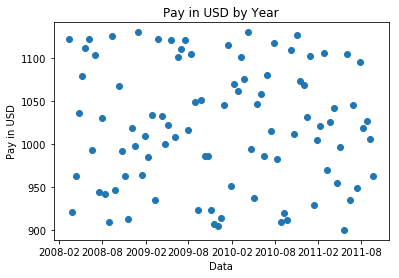

In [158]:
X,Y = data2.index, data2["Pay"]
plt.plot(X,Y,'o')
plt.xlabel("Data")
plt.ylabel("Pay in USD")
plt.title("Pay in USD by Year")
plt.show()

Question #4

In [211]:
dates_p = pd.period_range(start="1978-09", periods=84,freq="Q-DEC")
data3 = pd.read_csv("finances.csv")
data3b = pd.DataFrame(dates_p)
data3['Quarter'] = data3b
data3 = data3.set_index('Quarter')
data3.head()

,EARNINGS,EXPENSES
Quarter,,
1978Q3,372572.16,122611.27
1978Q4,419440.58,133176.18
1979Q1,419766.49,154670.69
1979Q2,361453.31,209360.42
1979Q3,354463.33,174147.13


Question #5

In [128]:
data = pd.read_csv("website_traffic.csv")
data.ENTER = pd.to_datetime(data.ENTER,format='%Y-%m-%d %H:%M:%S')
data.LEAVE = pd.to_datetime(data.LEAVE,format='%Y-%m-%d %H:%M:%S')
time = pd.Period("2016-10-07 01:00:00")
#data = data.set_index(time)
#data.head()

Question #6

In [236]:
data = pd.read_csv("DJIA.csv")
data['Datetime'] = pd.to_datetime(data['DATE'])
data = data.set_index('Datetime')
data = data.drop(['DATE'], axis=1)
data = data['VALUE'].replace('.', np.nan)
data = data.dropna()
data = pd.DataFrame(data)

data.VALUE = pd.to_numeric(data.VALUE, errors='coerce')
data_s = data.VALUE.shift(1)
data_s = pd.to_numeric(data_s)
day = data.VALUE - data_s
day = day.dropna()

print("Largest Gain (Day)    :", max(day))
print("Largest Loss (Day)    :", min(day))

data2 = data.resample('m').mean()
data2 = data2.drop([data2.index[0], data2.index[120]])
data2.VALUE = pd.to_numeric(data2.VALUE, errors='coerce')
data_s2 = data2.VALUE.shift(1)
data_s2 = pd.to_numeric(data_s2)
day2 = data2.VALUE - data_s
day2 = day2.dropna()

print("---------------------------------")
print("Largest Gain (Month)  :", max(day2))
print("Largest Loss (Month)  :", min(day2))


Largest Gain (Day)    : 936.42
Largest Loss (Day)    : -777.68
---------------------------------
Largest Gain (Month)  : 748.632380952
Largest Loss (Month)  : -715.179047619


Question #7

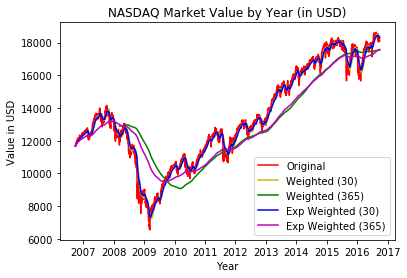

In [269]:
data = pd.read_csv("DJIA.csv")
data['Datetime'] = pd.to_datetime(data['DATE'])
data = data.set_index('Datetime')
data = data.drop(['DATE'], axis=1)
data = data['VALUE'].replace('.', np.nan)
data = data.dropna()
data = pd.DataFrame(data)

data1 = data.copy()
plt.plot(data1.index,data1.VALUE,'-',color='r',label="Original")
plt.xlabel("Year")
plt.ylabel("Value in USD")
plt.title("NASDAQ Market Value by Year (in USD)")

data2 = data.rolling(30).mean()
plt.plot(data2.index,data2.VALUE,'-',color='y',label="Weighted (30)")

data3 = data.rolling(365).mean()
plt.plot(data3.index,data3.VALUE,'-',color='g',label="Weighted (365)")

data4 = data.ewm(span=30).mean()
plt.plot(data4.index,data4.VALUE,'-',color='b',label="Exp Weighted (30)")

data5 = data.ewm(span=365).mean()
plt.plot(data5.index,data5.VALUE,'-',color='m',label="Exp Weighted (365)")

plt.legend()

plt.show()